#Advanced Model Evaluation#

**Review of Titanic Exercise**

*Task 1 - Read titanic.csv into a DataFrame.*

In [92]:
import pandas as pd
data = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT7/master/data/titanic.csv', index_col='PassengerId')

*Task 2 - Define Pclass and Parch as the features, and Survived as the response.*

In [93]:
feature_cols = ['Pclass', 'Parch']
X = data[feature_cols]
y = data.Survived

*Task 3 - Split the data into training and testing sets.*

In [5]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

*Task 4 - Fit a logistic regression model and examine the coefficients to confirm that they make intuitive sense.*

In [7]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)

logreg.fit(X_train,y_train)

zip(feature_cols, logreg.coef_[0])

[('Pclass', -0.88188860564509608), ('Parch', 0.3423921585749839)]

*Task 5 - Make predictions on the testing set and calculate the accuracy.*

In [8]:
y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.668161434978


- Remember, training accuracy is % correct on the TRAINING data
- Testing accuracy is the % correct on the TEST data

*Trying to add Age as a feature*
- You'll get an error
- There are too many missing values for Age
- scikit learn models expect there to be no missing values
- imputation: filling in missing values

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
data.dropna().shape

(183, 12)

It would be a bad idea to drop all rows with missing data, because you'll only have 183 records left (original ~800)

What about dropping rows where age is missing?

In [13]:
data[data.Age.notnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S


You've still lost 20% of your data, which is still kind of a lot...

So let's trying imputation instead

In [115]:
data.Age.fillna(data.Age.mean(), inplace=True)   # filling in the missing values with the mean

KNN is actually a method for imputation. You can impute using scikit learn as well! [**look at Kevin's notebook**]

In [17]:
feature_cols = ['Pclass', 'Parch', 'Age']
X = data[feature_cols]
y = data.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

logreg.fit(X_train,y_train)

zip(feature_cols, logreg.coef_[0])

y_pred_class = logreg.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.67264573991


###Null Accuracy###

What accuracy could I achieve if I predict just the most frequent observation?
- Good for evaluating your model, see how useful it actually is

In [18]:
print y_test.mean()
print 1 - y_test.mean()

0.42600896861
0.57399103139


This only works for binary classification.

0  0  0  1

Average = 0.25

1 - Average = 0.75

The null accuracy will be the higher of the two numbers. So for the titanic example, you would compare the null accuracy = 0.57 with the testing accuracy = 0.67

In [20]:
# equivalent function in scikit-learn
from sklearn.dummy import DummyClassifier
dumb = DummyClassifier(strategy='most_frequent')
dumb.fit(X_train, y_train)
y_dumb_class = dumb.predict(X_test)
print metrics.accuracy_score(y_test, y_dumb_class)

0.57399103139


### Confusion Matrix ###

In [29]:
cnf = metrics.confusion_matrix(y_test, y_pred_class)
print cnf

[[107  21]
 [ 52  43]]


TN     FP

FN     TP

In [34]:
sens = float(cnf[1][1])/(cnf[1][1] + cnf[1][0])
print sens

0.452631578947


In [36]:
spec = float(cnf[0][0])/(cnf[0][0] + cnf[0][1])
print spec

0.8359375


In [38]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

Let's plot the predicted probabilities

(array([  8.,  66.,  27.,  16.,  27.,  32.,   8.,  24.,   9.,   6.]),
 array([ 0.07652196,  0.15504032,  0.23355867,  0.31207703,  0.39059539,
         0.46911375,  0.54763211,  0.62615047,  0.70466882,  0.78318718,
         0.86170554]),
 <a list of 10 Patch objects>)

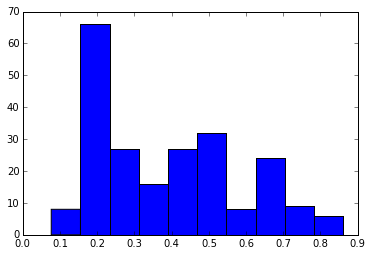

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(y_pred_prob)

Note that the confusion matrix doesn't take the predictive probabilities into account-- the default is 50%, so using logistic regression the positive (1) and negative (0) classes are determined based on the predictive probability being either above or below 50%. What we've done in the graph above is see the distribution of the predictive probabilities.

When you lower a threshold --> your model becomes more sensitive!

When you increase a threshold --> your model becomes more specific!

In [40]:
# adjusting the threshold
import numpy as np
y_pred_class = np.where(y_pred_prob > 0.25, 1, 0)

In [41]:
cnf = metrics.confusion_matrix(y_test, y_pred_class)
print cnf

[[57 71]
 [27 68]]


In [42]:
sens = float(cnf[1][1])/(cnf[1][1] + cnf[1][0])
print sens

0.715789473684


In [43]:
spec = float(cnf[0][0])/(cnf[0][0] + cnf[0][1])
print spec

0.4453125


###Handling Categorical Feautres###

scikit-learn expects all features to be numeric-- how do we include categorical features?

- Ordered categories: transform to sensible numeric values (e.g. small = 1, med = 2, large = 3); need to assume that the relationship between the categories are constant
- Unordered categories: use dummy encoding

Scale matters! When we put these numbers in a feature matrix, scikit-learn will learn the numerical relationship.

Pclass is an ordered categorical feature, and is already encoded as 1/2/3, so we leave it as-is

Sex is an unordered categorical feature and thus must be dummy encoded

In [95]:
data['Sex_Female'] = data.Sex.map({'male':0, 'female':1})

In [46]:
# include Sex_Female in the model
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Female']
X = data[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg=LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, penalty='l2',
          random_state=None, tol=0.0001)

In [47]:
zip(feature_cols, logreg.coef_[0])

[('Pclass', -1.2209320896335936),
 ('Parch', -0.1173948907649864),
 ('Age', -0.040484254140439373),
 ('Sex_Female', 2.6815252115122519)]

Negative logodds --> decrease in odds --> decrease in probability

So increases in Pclass, Parch, and Age decreases survival rates.

For Sex_Female: compared to being a male (baseline level), being a female has a 2.68 increase in logodds of the response
- compared to a baseline
- this is the effect of the change from positive (female) to baseline (male)

In [48]:
zip(feature_cols, np.exp(logreg.coef_[0]))

[('Pclass', 0.29495511415273223),
 ('Parch', 0.88923397353722),
 ('Age', 0.96032428552369853),
 ('Sex_Female', 14.607355621144643)]

If your age increases by one unit, 

Predict the probability of survival for Adam: first class, no parents or kids, 29 yrs old, male

In [50]:
logreg.predict_proba([1, 0, 29, 0])[:, 1]

array([ 0.50359602])

Probability of survival is roughly 50%. His odds of survival are 1:1

What about Bill in second class?

In [51]:
logreg.predict_proba([2, 0, 29, 0])[:, 1]

array([ 0.23031245])

In [52]:
# convert Adam's probability to odds
adamodds = 0.5/(1 - 0.5)

# adjust odds for Bill due to lower class
billodds = adamodds * 0.295

# convert Bill's odds to probability
billodds/(1 + billodds)

0.2277992277992278

Now Susan, who is the same as Adam but female

In [53]:
logreg.predict_proba([1, 0, 29, 1])[:, 1]

array([ 0.93678484])

In [54]:
#calculating ourselves

# adjust odds for Susan due to her sex
susanodds = adamodds * 14.6

# convert Susan's odds to probability
susanodds/(1 + susanodds)

0.9358974358974359

How do we interpret the Sex_Female coefficient? For a given Pclass/Parch/Age, being female is associated with an increase in the log-odds of survival by 2.68 (or an increase in the odds of survival by 14.6) as compared to a male, which is called the baseline level.

What if we reversed the coding?

In [57]:
# encode Sex_Male feature
data['Sex_Male'] = data.Sex.map({'male':1, 'female':0})

In [72]:
# include Sex_Male in the model instead of Sex_Female
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Male']
X = data[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

[('Pclass', -1.2201766751188299),
 ('Parch', -0.11678129094226299),
 ('Age', -0.040432989870520367),
 ('Sex_Male', -2.6803869023925055)]

In [60]:
zip(feature_cols, np.exp(logreg.coef_[0]))

[('Pclass', 0.29517801170659103),
 ('Parch', 0.88977977478039028),
 ('Age', 0.96037351710898122),
 ('Sex_Male', 0.068536632036964071)]

###Dummy encoding with more than two levels###

In [62]:
data.Embarked.value_counts() # which port they got onto the ship from

S    644
C    168
Q     77
dtype: int64

Can't encode as 1-2-3 because it presumes an ordered relationship.

In [77]:
pd.get_dummies(data.Embarked, prefix='Embarked').head(10)

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [96]:
# you only need two columns
Emb_dummies = pd.get_dummies(data.Embarked, prefix='Embarked').iloc[:, 1:].head(10)
print Emb_dummies

             Embarked_Q  Embarked_S
PassengerId                        
1                     0           1
2                     0           0
3                     0           1
4                     0           1
5                     0           1
6                     1           0
7                     0           1
8                     0           1
9                     0           1
10                    0           0


This defines C as the baseline (where Q = 0 and S = 0)

In [97]:
data = pd.concat([data, Emb_dummies], axis = 1) # concatenate data and embarked dummies on the first axis

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Female,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,0,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,0,1


In [124]:
data.Embarked_Q.isnull().sum()

881

In [119]:
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Female', 'Embarked_Q']
X = data[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg=LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [107]:
data.Embarked_Q.value_counts()

0    9
1    1
dtype: int64

In [116]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Female,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,0,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,0,1


In [108]:
# TASK 1: read the data from titanic.csv into a DataFrame
import pandas as pd
url = 'https://raw.githubusercontent.com/justmarkham/DAT7/master/data/titanic.csv'
titanic = pd.read_csv(url, index_col='PassengerId')

# TASK 2: define Pclass/Parch as the features and Survived as the response
feature_cols = ['Pclass', 'Parch']
X = titanic[feature_cols]
y = titanic.Survived

In [109]:
# encode Sex_Female feature
titanic['Sex_Female'] = titanic.Sex.map({'male':0, 'female':1})

In [110]:
# create a DataFrame with the two dummy variable columns
embarked_dummies = pd.get_dummies(titanic.Embarked, prefix='Embarked').iloc[:, 1:]

# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
titanic = pd.concat([titanic, embarked_dummies], axis=1)

In [114]:
titanic.head(20)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_Female,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S,0,0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,1,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,1,0,1
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S,0,0,1
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0,1,0
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,0,0,1
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S,0,0,1
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S,1,0,1


In [111]:
# include Embarked_Q and Embarked_S in the model
feature_cols = ['Pclass', 'Parch', 'Age', 'Sex_Female', 'Embarked_Q', 'Embarked_S']
X = titanic[feature_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
logreg=LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)
zip(feature_cols, logreg.coef_[0])

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').